<h1 align='center'> 영상처리 프로그래밍 실습 4</h1>

<h6 align='right'> 2022. 3. 31. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 6일 (수) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.20.3


## 지난 주 예제 8.

In [83]:
white = (255, 255, 255)
img = cv2.imread("bird.png")

pt1 = np.array([30, 30])
rect = [300, 200]
img_a = img.copy()
cv2.rectangle(img_a, pt1, rect, white, cv2.LINE_4)

cropped_img = img[pt1[0]:pt1[0]+rect[1],pt1[1]:pt1[1]+rect[0],:]
cv2.imshow("Cropped", cropped_img)
cv2.imshow("Image", img_a)

while cv2.waitKey(0) != ord('q'):
    pass

cv2.destroyAllWindows()

## 지난 주 문제 1.

예제 8의 프로그램을 다음과 같이 수정하라.

1. 'Image' 윈도우에서 마우스 왼쪽 버튼을 클릭하면 그 위치가 하얀색 창의 왼쪽 위 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

2. 'Image' 윈도우에서 마우스 오른쪽 버튼을 클릭하면 그 위치가 하얀색 창의 오른쪽 아래 꼭지점의 좌표를 지정하게 되고, 흰색 창의 크기가 변하고 흰색 창에 포함된 영상이 'Cropped' 윈도우에 표시된다.

3. 'Cropped' 윈도우에서 왼쪽 마우스 버튼을 클릭하면 사용자에게 저장할 파일 이름을 입력받아서 'Cropped' 윈도우에 표시된 영상 부분을 별도의 파일로 저장한다.

In [97]:
def onMouseClick(event, x, y, flags, param):
    global pt1, pt2, img_a, cropped_img, clicked
    if event == cv2.EVENT_LBUTTONUP:
        pt1 = x, y
        clicked = clicked | LUP
        if clicked == (LUP | RUP) :
            img_a = img.copy()
            cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
            cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
            cv2.imshow("Cropped", cropped_img)
            cv2.imshow("Image", img_a)
            clicked = UNCLICKED
        else: #왼쪽이 눌렸는데 오른쪽은 안눌린 상태
            img_a = img.copy()
            cv2.imshow("Image", img_a)



    elif event == cv2.EVENT_RBUTTONUP:
        pt2 = x, y
        clicked = clicked | RUP
        if clicked == (LUP | RUP) :
            img_a = img.copy()
            cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
            cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
            cv2.imshow("Cropped", cropped_img)
            cv2.imshow("Image", img_a)
            clicked = UNCLICKED
        else: #오른쪽이 눌렸는데 왼쪽은 안눌린 상태
            img_a = img.copy()
            cv2.imshow("Image", img_a)

            
def saveCroppedImage(event, x, y, flags, param):
    global cropped_img
    if event == cv2.EVENT_LBUTTONUP:
        file_name = input("Enter a file name:")
        cv2.imwrite(file_name, cropped_img)

white = (255, 255, 255)
img = cv2.imread("bird.png")

UNCLICKED = 0
LUP = 1
RUP = 2
clicked = UNCLICKED



img_a = img.copy()

#cv2.namedWindow("Image", cv2.WINDOW_GUI_NORMAL)
cv2.namedWindow("Cropped", cv2.WINDOW_GUI_NORMAL)
cv2.imshow("Image", img_a)

cv2.setMouseCallback("Image", onMouseClick)
cv2.setMouseCallback("Cropped", saveCroppedImage)
while cv2.waitKey(0) != ord('q'):
    pass


cv2.destroyAllWindows()

## NumPy의 다차원 배열의 axis 이해하기

In [4]:
arr = np.arange(1, 121, 2)
arr

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119])

In [5]:
arr.shape

(60,)

- arr을 shape이 (3, 4, 5)인 배열의 view를 arr3라 하고, arr3를 만들어라.

In [6]:
arr3 = arr.reshape(3,4,5) # = arr.reshape(-1,4,5) = arr.reshape(3,-1,5) = = arr.reshape(3,4,-1)
arr3

array([[[  1,   3,   5,   7,   9],
        [ 11,  13,  15,  17,  19],
        [ 21,  23,  25,  27,  29],
        [ 31,  33,  35,  37,  39]],

       [[ 41,  43,  45,  47,  49],
        [ 51,  53,  55,  57,  59],
        [ 61,  63,  65,  67,  69],
        [ 71,  73,  75,  77,  79]],

       [[ 81,  83,  85,  87,  89],
        [ 91,  93,  95,  97,  99],
        [101, 103, 105, 107, 109],
        [111, 113, 115, 117, 119]]])

In [37]:
arr[0] = 200
arr

array([200,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119])

In [12]:
arr3

array([[[200,   3,   5,   7,   9],
        [ 11,  13,  15,  17,  19],
        [ 21,  23,  25,  27,  29],
        [ 31,  33,  35,  37,  39]],

       [[ 41,  43,  45,  47,  49],
        [ 51,  53,  55,  57,  59],
        [ 61,  63,  65,  67,  69],
        [ 71,  73,  75,  77,  79]],

       [[ 81,  83,  85,  87,  89],
        [ 91,  93,  95,  97,  99],
        [101, 103, 105, 107, 109],
        [111, 113, 115, 117, 119]]])

- np.sum() 함수를 이용하여 61, 63, 65, 67, 69의 합 325 구하기

In [8]:
np.sum(arr3,2) # np.sum(arr3, axis=2)

array([[ 25,  75, 125, 175],
       [225, 275, 325, 375],
       [425, 475, 525, 575]])

In [38]:
np.sum(arr3, 2)[1,2] 

325

- np.sum() 함수를 이용하여 47, 57, 67, 77의 합 248 구하기

In [10]:
np.sum(arr3, 1) # np.sum(arr3, axis=1)

array([[ 64,  72,  80,  88,  96],
       [224, 232, 240, 248, 256],
       [384, 392, 400, 408, 416]])

In [40]:
np.sum(arr3, 1)[1,3]

248

- np.sum() 함수를 이용하여 15, 55, 95의 합 165 구하기

In [12]:
np.sum(arr3,0) # axis = 0

array([[123, 129, 135, 141, 147],
       [153, 159, 165, 171, 177],
       [183, 189, 195, 201, 207],
       [213, 219, 225, 231, 237]])

In [11]:
np.sum(arr3, 0)[1,2]

165

# NumPy ndarray 객체 구조 이해

### NumPy 데이터 타입 이해
```
getsizeof(...)
    getsizeof(object [, default]) -> int
    
    Return the size of object in bytes.
```

In [44]:
help(sys.getsizeof) 

Help on built-in function getsizeof in module sys:

getsizeof(...)
    getsizeof(object [, default]) -> int
    
    Return the size of object in bytes.



## 예제 1. 
sys.getsizeof() 함수를 사용하여 ndarray의 원소의 개수에 따른 객체의 크기 확인하기


In [3]:
import sys

In [4]:
def info_array(arr):
    print(arr)
    print("dtype:", arr.dtype)
    print("size:", sys.getsizeof(arr))
    print("id:", id(arr))

#### 1.1 빈 ndarray 객체의 크기는 얼마인가?

In [5]:
empty_array = np.array([]) # empty array
info_array(empty_array)

[]
dtype: float64
size: 104
id: 140517912328304


#### 1.2 ndarray의 dtype에 따른 ndarray 객체의 크기 살펴 보기

In [6]:
i32_array = np.arange(4, dtype=np.int16) # 16bit -> 2byte
info_array(i32_array)

[0 1 2 3]
dtype: int16
size: 112
id: 140517912328976


In [8]:
#32-bit integer
i32_array = np.arange(4, dtype= np.int32) # 32bit -> 4byte
info_array(i32_array)

[0 1 2 3]
dtype: int32
size: 120
id: 140553077992592


In [10]:
#64-bit integer
i64_array = np.arange(4, dtype= np.int64) # 64bit -> 8byte
info_array(i64_array)

[0 1 2 3]
dtype: int64
size: 136
id: 140553904886192


In [9]:
#8-bit unsigned integer
u8_array = np.arange(4, dtype= np.uint8)
info_array(u8_array)

[0 1 2 3]
dtype: uint8
size: 108
id: 140553881695408


In [12]:
f16_array = np.arange(4, dtype= np.float16)
info_array(f16_array)

[0. 1. 2. 3.]
dtype: float16
size: 112
id: 140553881697040


## 예제 2. 
sys.getsizeof() 함수를 사용하여 ndarray의 원소의 개수에 따른 객체의 크기 확인하기cv


## 예제 3. 
sys.getsizeof() 함수를 사용하여 ndarray와 view 객체의 크기 확인하기


In [16]:
x = np.arange(24)
y = x.reshape(2,3,4)
y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [17]:
x.size, y.size

(24, 24)

In [13]:
info_array(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
dtype: int64
size: 296
id: 140553078133360


In [14]:
info_array(y)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
dtype: int64
size: 136
id: 140553078133456


In [19]:
a1 = np.array([])
a2 = np.array([[]])
a3 = np.array([[[]]])

In [20]:
a1.shape, a2.shape, a3.shape

((0,), (1, 0), (1, 1, 0))

In [22]:
info_array(a1)

[]
dtype: float64
size: 112
id: 2643348381296


In [23]:
info_array(a2)

[]
dtype: float64
size: 128
id: 2643348381104


In [24]:
info_array(a3)

[]
dtype: float64
size: 144
id: 2643348582928


In [25]:
info_array(x[10:15])

[10 11 12 13 14]
dtype: int32
size: 112
id: 2643348583312


In [26]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [29]:
x1 = x[10:15]
x1

array([10, 11, 12, 13, 14])

In [30]:
x1[0] += 100
x1

array([110,  11,  12,  13,  14])

In [31]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 110,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

### NumPy view를 이용한 image cropping

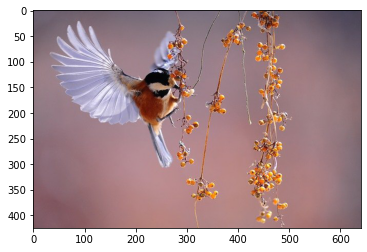

In [7]:
img = plt.imread('bird.png')
plt.imshow(img)

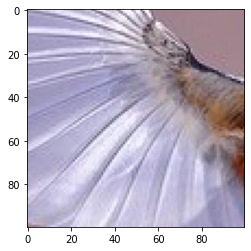

In [8]:
img_cropped = img[100:200,100:200,::]
plt.imshow(img_cropped)

In [40]:
sys.getsizeof(img), sys.getsizeof(img_cropped)

(4352144, 144)

In [41]:
img.shape

(425, 640, 4)

In [42]:
sys.getsizeof(img)

4352144

In [44]:
sys.getsizeof(img_cropped)

144

In [45]:
sys.getsizeof(np.array([])), sys.getsizeof(np.array([[]])), sys.getsizeof(np.array([[[]]]))

(112, 128, 144)

In [46]:
img1 = img[100:200,100:200,:]
print(id(img1))
img2 = img[200:300,200:300,:]
print(id(img2))

2643350523696
2643350522256


In [35]:
x = np.arange(4, dtype=np.int32)
x

array([0, 1, 2, 3])

In [36]:
y = x.view(dtype=np.uint8)
y

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0], dtype=uint8)

In [ ]:
sys.getsizeof(x), sys.getsizeof(y)

In [ ]:
x = np.arange(8, dtype=np.int32)
y = x.view(dtype=np.uint8)
y

In [ ]:
sys.getsizeof(x), sys.getsizeof(y)

In [ ]:
empty_arr = np.array([], dtype=np.int32)
sys.getsizeof(empty_arr)

## NumPy 브로드캐스팅 연습

In [9]:
a = np.arange(1, 7).reshape(2,3)
a

array([[1, 2, 3],
       [4, 5, 6]])

####  배열 a와 연산 가능한 배열의 shape을 모두 적어라

In [10]:
b = np.arange(11, 17).reshape(2,3)
b.shape

(2, 3)

In [11]:
a+b # a와 b가 shape이 같은 경우(2,3)

array([[12, 14, 16],
       [18, 20, 22]])

In [12]:
# scalar
a+3

array([[4, 5, 6],
       [7, 8, 9]])

In [13]:
# (1,1)
b = np.array([[3]])
b.shape

(1, 1)

In [14]:
a+b

array([[4, 5, 6],
       [7, 8, 9]])

In [15]:
#(1,3) 배열
b = np.array([[1,3,5]])
b.shape

(1, 3)

In [16]:
a+b

array([[ 2,  5,  8],
       [ 5,  8, 11]])

In [17]:
#(2,1) 배열
b = np.array([[3],[5]])
b.shape

(2, 1)

In [18]:
a+b

array([[ 4,  5,  6],
       [ 9, 10, 11]])

In [19]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [20]:
a = np.arange(5).reshape(1,5)
a

array([[0, 1, 2, 3, 4]])

In [75]:
a + 3

array([[3, 4, 5, 6, 7]])

In [73]:
#(1,1)
a + np.array([[3]])

array([[3, 4, 5, 6, 7]])

In [76]:
#(3,1)
b = np.array([[3],[4],[5]])
b.shape

(3, 1)

In [86]:
a

array([[0, 1, 2, 3, 4]])

In [87]:
b

array([[3],
       [4],
       [5]])

In [77]:
a+b

array([[3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

## 문제 1.
다음 조건을 모두 만족하는 프로그램을 작성하라.

1. 'bird.png' 파일을 읽고, cv2.imshow 함수를 이용하여 "Image" title을 가진 윈도우에 영상을 표시한다.
2. cv2.namedWindow("Cropped", 0) 으로 윈도우를 만든다.
3. "Image" 윈도우 위에 마우스 왼쪽 버튼을 누른 상태로 마우스를 움직이면 처음 마우스를 누른 위치가 사각형의 꼭지점이고 현재 마우스의 위치가 대각선 꼭지점인 사각형이 나타난다. 마우스를 움직이면 사각형의 크기가 계속 변한다.
4. 마우스의 왼쪽 버튼을 놓으면(release) 현재 사각형 내부의 영상이 "Cropped" 윈도우에 나타난다.
5. 새 위치에 마우스 왼쪽 버튼을 누르면 3 번 동작이 반복된다.
6. 'q'를 누르면 모든 윈도우가 닫히고 프로그램이 종료된다.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np


def onMouseClick(event, x, y, flags, param):
    global pt1, pt2, img_a, cropped_img, clicked
    if(event == cv2.EVENT_LBUTTONDOWN and clicked != 1): # 왼쪽 버튼이 처음 눌리는 경우
        pt1 = x, y
        clicked = clicked | LDOWN
    elif(event == cv2.EVENT_MOUSEMOVE and clicked == 1): # 왼쪽 버튼이 이미 눌린 상태에서 마우스가 움직일 때
        pt2 = x, y # 마우스가 움직이는 동안 좌표를 업데이트
        img_a = img.copy()
        cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4) 
        cv2.imshow("Image", img_a)

    elif(event == cv2.EVENT_LBUTTONUP): # 왼쪽 버튼이 떼지는 경우
        pt2 = x, y # 왼쪽 버튼이 떼어진 순간의 좌표를 p2 에 저장
        clicked = clicked | LUP # 왼쪽 버튼 떼어짐 체크


        if(pt1[0] > pt2[0]):
            if(pt1[1] < pt2[1]): # 왼쪽 버튼 클릭이 오른쪽 위에서 시작한 경우

                pt1_copy = pt1[0] 
                li1 = list(pt1) # 튜플을 수정하기위해 리스트로 변환
                li2 = list(pt2)
                li1[0] = li2[0] 
                li2[0] = pt1_copy # y좌표를 서로 바꿔준다
                pt1 = tuple(li1)
                pt2 = tuple(li2) #튜플로 다시 변환

            else:#왼쪽 버튼 클릭이 오른쪽 밑에서 시작한 경우
                pt1_copy = pt1
                pt1 = pt2
                pt2 = pt1_copy  # 두좌표를 값을 바꿔줌 
                
        elif(pt1[1] > pt2[1]):#왼쪽 버튼 클릭이 왼쪽 밑에서 시작한 경우
            pt1_copy = pt1[1] 
            li1 = list(pt1) # 튜플을 수정하기위해 리스트로 변환
            li2 = list(pt2)
            li1[1] = li2[1] 
            li2[1] = pt1_copy # y좌표를 서로 바꿔준다
            pt1 = tuple(li1)
            pt2 = tuple(li2) #튜플로 다시 변환
        
        
    if(clicked == (LUP | LDOWN)): # 왼쪽 버튼이 눌렸다 떼어진 경우
        img_a = img.copy() 
        cv2.rectangle(img_a, pt1, pt2, white, cv2.LINE_4)
        cropped_img = img[pt1[1]:pt2[1]+1, pt1[0]:pt2[0]+1,:]
        cv2.imshow("Cropped", cropped_img)
        cv2.imshow("Image", img_a)
        clicked = UNCLICKED # 마우스 클릭 초기화

def saveCroppedImage(event, x, y, flags, param):
    global cropped_img
    if event == cv2.EVENT_LBUTTONUP:
        file_name = input("Enter a file name:")
        cv2.imwrite(file_name, cropped_img)

white = (255, 255, 255)
img = cv2.imread("bird.png")

UNCLICKED = 0
LDOWN = 1
LUP = 2
clicked = UNCLICKED

pt1 = np.array([img.shape[1]//4, img.shape[0]//4]) # (x, y)
pt2 = pt1 + img.shape[1] // 2


img_a = img.copy()

cv2.namedWindow("Cropped", 0)
cv2.imshow("Image", img_a)

cv2.setMouseCallback("Image", onMouseClick)
cv2.setMouseCallback("Cropped", saveCroppedImage)
while cv2.waitKey(0) != ord('q'):
    pass


cv2.destroyAllWindows()

## 문제 2.

문제 1에서 원영상을 표현하는 3차원 배열에서 index slicing을 적용하여 crop된 영상 데이터 배열을 표현하는 경우에 copy() 함수를 사용하는 경우에 비해서 어떤 장점이 있는지 생각해서 적어보아라.

참고: https://pythonspeed.com/articles/numpy-memory-views/

index slicing을 하는 것은 원래 배열에 대한 view 이기 때문에 메모리를 따로 할당하지 않습니다. 메모리를 따로 할당하지 않으므로 메모리 효율측면에서 copy()함수를 이용하는 것보다 index slicing을 사용하는 것이 더 좋습니다. 하지만 view는 원래 배열에 대한 메모리를 공유하기 때문에 모든 view를 삭제해야만 원래 배열의 메모리가 해제됩니다. 또한, view를 수정할 경우 원래 배열도 수정 되는 문제도 있습니다.